Import Libraries

In [64]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import silhouette_score
from sklearn.model_selection import train_test_split
custom_colors = [
    '#1f77b4', '#ff7f0e', "#3FA23F", '#d62728',
    '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf',
    '#393b79', '#637939', '#8c6d31', '#843c39', '#7b4173',
    '#5254a3', '#9c9ede', '#6b6ecf', '#b5cf6b', '#cedb9c',
    '#e7ba52', '#bd9e39', '#ad494a', '#a55194', '#de9ed6',
    '#3182bd', '#31a354', '#756bb1', '#ff9896', '#c5b0d5'
]


Explore the data

In [65]:
data=pd.read_csv(r"D:\Downloads\Mall_Customers.csv")
data

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [66]:
data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [67]:
data.tail()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18
199,200,Male,30,137,83


In [68]:
data.loc[25:35]

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
25,26,Male,29,28,82
26,27,Female,45,28,32
27,28,Male,35,28,61
28,29,Female,40,29,31
29,30,Female,23,29,87
30,31,Male,60,30,4
31,32,Female,21,30,73
32,33,Male,53,33,4
33,34,Male,18,33,92
34,35,Female,49,33,14


In [69]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [70]:
data.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [71]:
data.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [72]:
duplicated=data.duplicated().sum()
duplicated

np.int64(0)

Visualize and Analyze data

In [73]:
data['Gender'].value_counts()

Gender
Female    112
Male       88
Name: count, dtype: int64

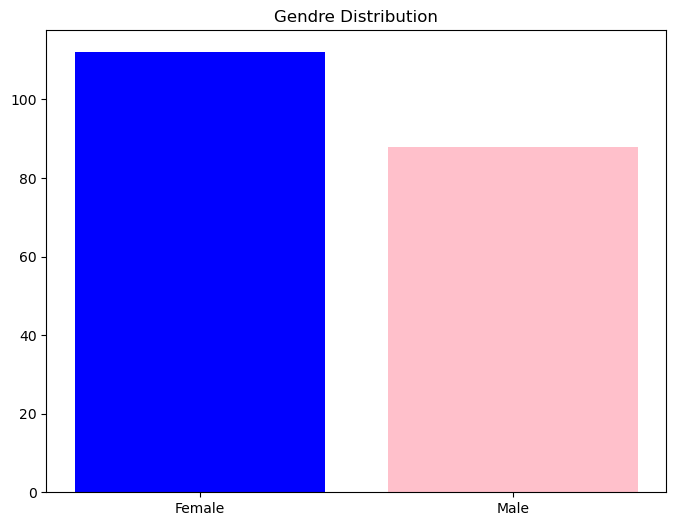

In [74]:
plt.figure(figsize=(8,6))
plt.bar(data['Gender'].value_counts().index, data['Gender'].value_counts().values, color=['blue', 'pink'])
plt.title ('Gendre Distribution')
plt.show()


In [75]:
data['Age'].describe()

count    200.000000
mean      38.850000
std       13.969007
min       18.000000
25%       28.750000
50%       36.000000
75%       49.000000
max       70.000000
Name: Age, dtype: float64

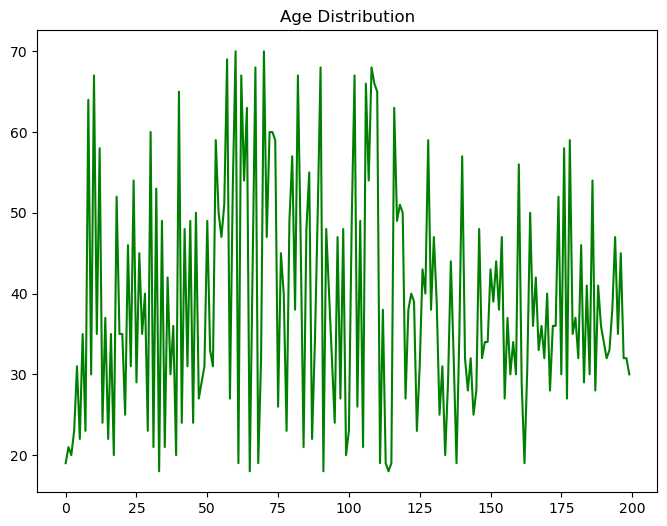

In [76]:
plt.figure(figsize=(8,6))
plt.plot(data['Age'], color='green')
plt.title('Age Distribution')
plt.show()

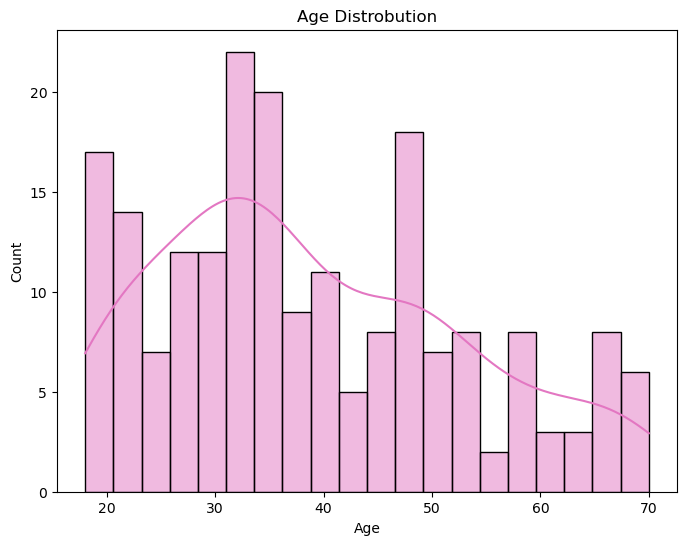

In [77]:
plt.figure(figsize=(8,6))
sns.histplot(data=data, x="Age", color=custom_colors[5],kde=True, bins=20)
plt.title('Age Distrobution')
plt.show()

In [78]:
data['Annual Income (k$)'].describe()

count    200.000000
mean      60.560000
std       26.264721
min       15.000000
25%       41.500000
50%       61.500000
75%       78.000000
max      137.000000
Name: Annual Income (k$), dtype: float64

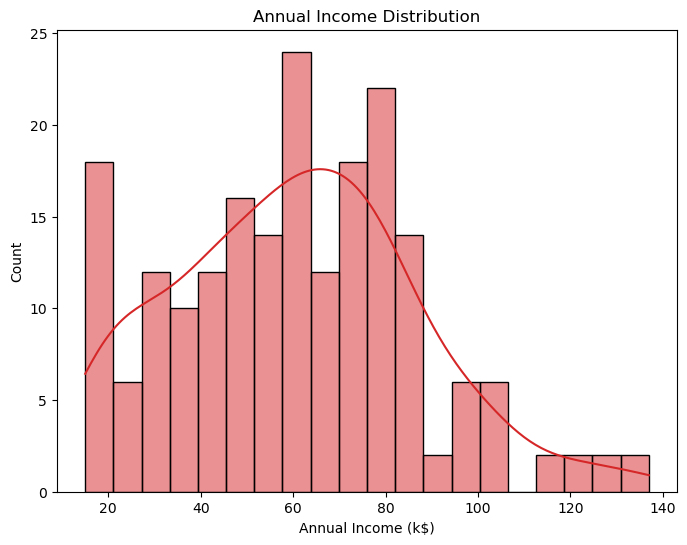

In [79]:
plt.figure(figsize=(8,6))
sns.histplot(data=data, x="Annual Income (k$)", color=custom_colors[3], kde=True, bins=20)
plt.title('Annual Income Distribution')
plt.show()

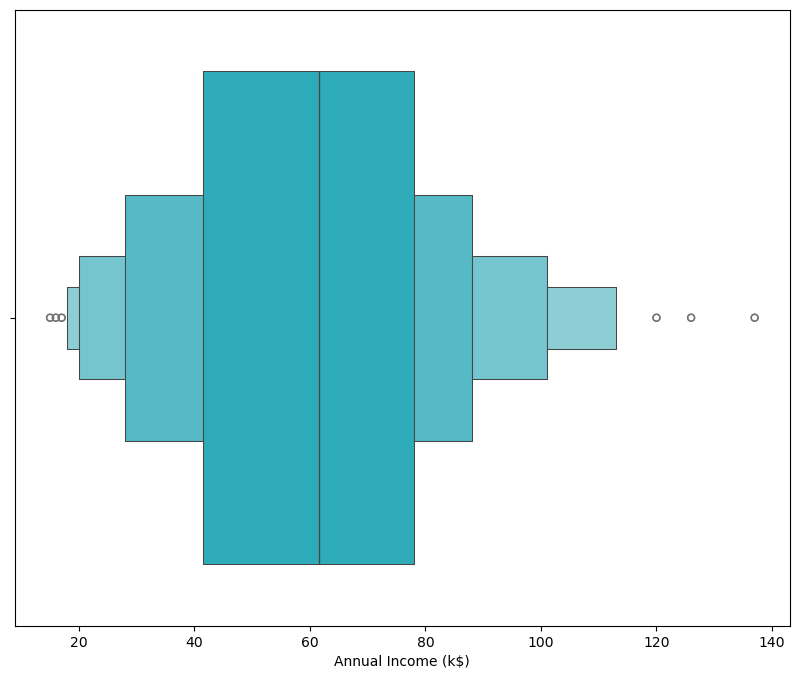

In [80]:
plt.figure(figsize=(10,8))
sns.boxenplot(data=data , x='Annual Income (k$)', color=custom_colors[8])
plt.show()

In [81]:

mask = (data['Annual Income (k$)'] > 115) | (data['Annual Income (k$)'] < 20)
data.drop(data[mask].index, inplace=True)
print("Removed rows:", mask.sum())
data.shape



Removed rows: 18


(182, 5)

In [82]:
data['Spending Score (1-100)'].describe()

count    182.000000
mean      50.192308
std       24.958559
min        1.000000
25%       35.000000
50%       50.000000
75%       69.000000
max       98.000000
Name: Spending Score (1-100), dtype: float64

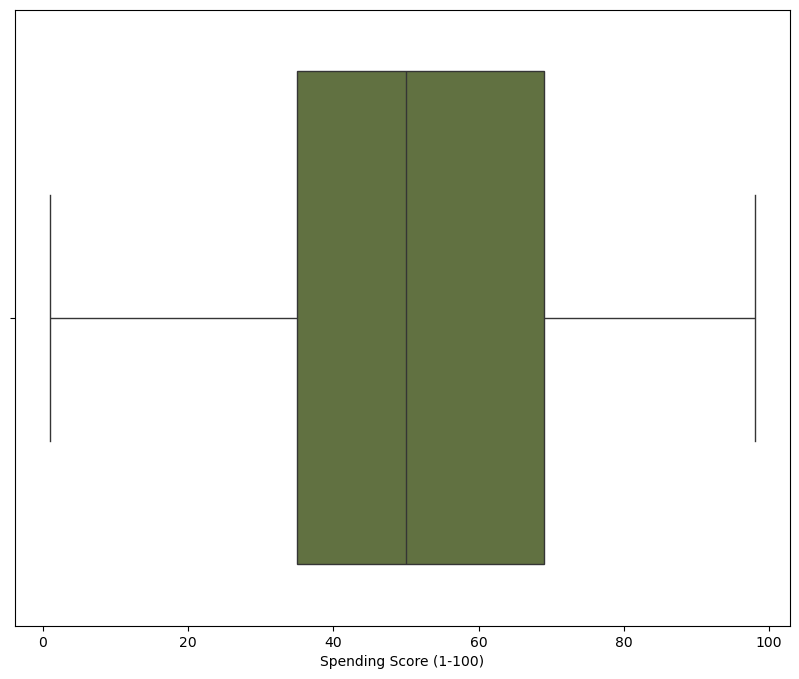

In [83]:
plt.figure(figsize=(10,8))
sns.boxplot(data=data , x='Spending Score (1-100)', color=custom_colors[10])
plt.show()

In [84]:
dropped_indexes=(data['Spending Score (1-100)']>95) | (data['Spending Score (1-100)']<10)
data.drop(data[dropped_indexes].index, inplace=True)
print("Removed rows:", dropped_indexes.sum())

Removed rows: 14


In [85]:
data=data.drop(['CustomerID'], axis=1)
data

,Gender,Age,Annual Income (k$),Spending Score (1-100)
12,Female,58,20,15
13,Female,24,20,77
14,Male,37,20,13
15,Male,22,20,79
16,Female,35,21,35
...,...,...,...,...
188,Female,41,103,17
189,Female,36,103,85
190,Female,34,103,23
191,Female,32,103,69


In [86]:
data.shape

(168, 4)

In [87]:
group=data.groupby("Gender")['Age'].describe()
group

,count,mean,std,min,25%,50%,75%,max
Gender,,,,,,,,
Female,97.0,38.546392,12.888965,18.0,29.0,36.0,49.0,68.0
Male,71.0,40.521127,15.489037,18.0,27.5,39.0,51.0,70.0


C:\Users\dg038\AppData\Local\Temp\ipykernel_18224\2719533493.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=data, x='Gender', y='Age', palette='Set2')


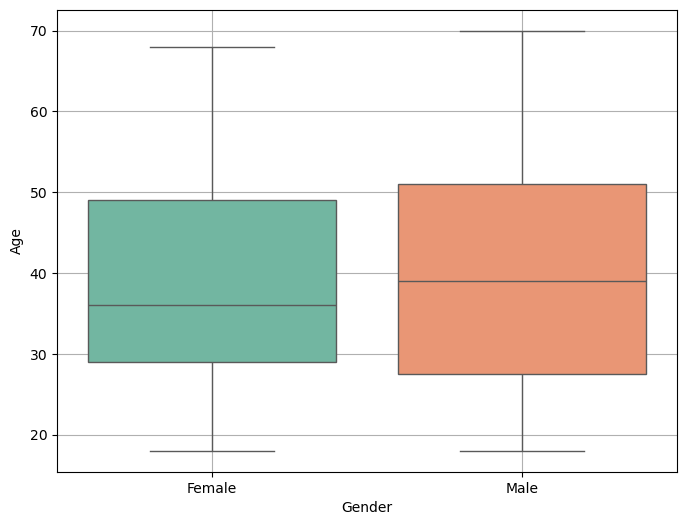

In [88]:
plt.figure(figsize=(8,6))
sns.boxplot(data=data, x='Gender', y='Age', palette='Set2')
plt.grid(True)
plt.show()

In [89]:
group=data.groupby('Gender')['Spending Score (1-100)'].describe()
group

,count,mean,std,min,25%,50%,75%,max
Gender,,,,,,,,
Female,97.0,52.195876,21.277257,13.0,40.0,50.0,71.0,95.0
Male,71.0,52.478873,23.676908,10.0,41.0,52.0,68.5,95.0


C:\Users\dg038\AppData\Local\Temp\ipykernel_18224\3564324925.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=data, x='Gender', y='Spending Score (1-100)', palette='Set2')


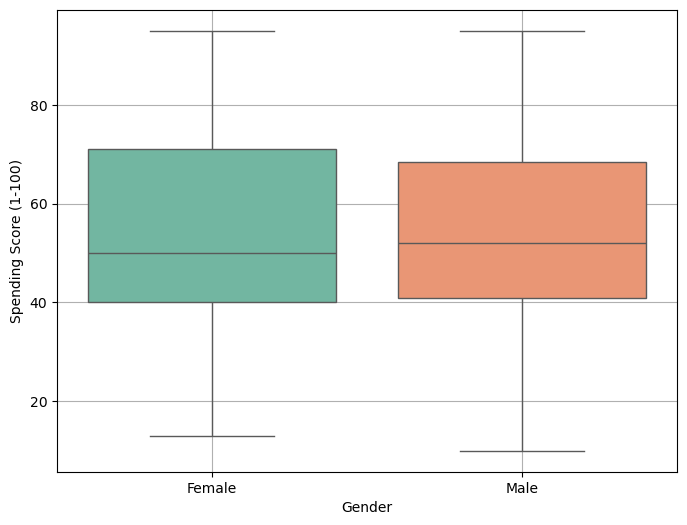

In [90]:
plt.figure(figsize=(8,6))
sns.boxplot(data=data, x='Gender', y='Spending Score (1-100)', palette='Set2')
plt.grid(True)
plt.show()

In [91]:
group=data.groupby('Gender')['Annual Income (k$)'].describe()
group

,count,mean,std,min,25%,50%,75%,max
Gender,,,,,,,,
Female,97.0,61.175258,21.897018,20.0,43.0,60.0,78.0,113.0
Male,71.0,60.211268,21.015583,20.0,46.0,62.0,76.0,101.0


C:\Users\dg038\AppData\Local\Temp\ipykernel_18224\3748976648.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=data, x='Gender', y='Annual Income (k$)', palette='Set2')


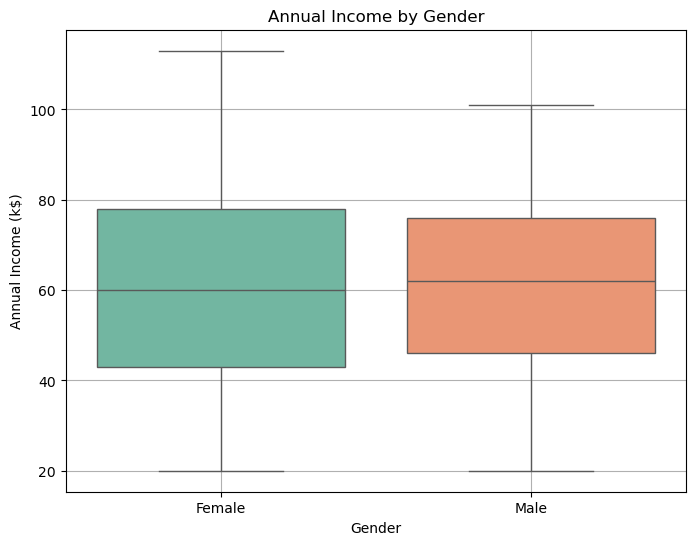

In [92]:
plt.figure(figsize=(8,6))
sns.boxplot(data=data, x='Gender', y='Annual Income (k$)', palette='Set2')
plt.title('Annual Income by Gender')
plt.grid(True)
plt.show()

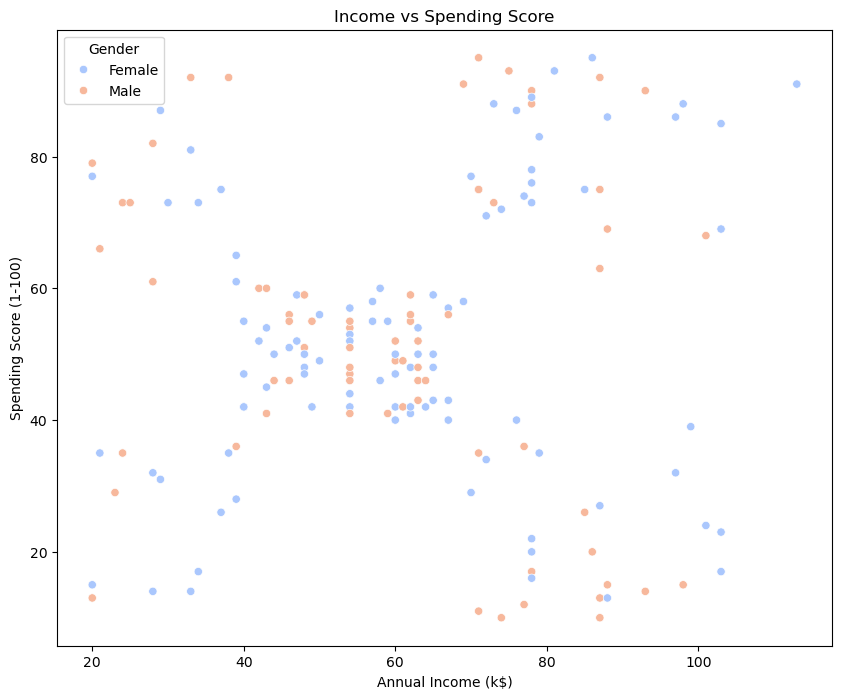

In [93]:
plt.figure(figsize=(10,8))
sns.scatterplot(data=data, x='Annual Income (k$)', y='Spending Score (1-100)', hue='Gender', palette='coolwarm')
plt.title('Income vs Spending Score')
plt.show()

In [94]:
data['Gender']=data['Gender'].map({'Male':0,'Female':1})

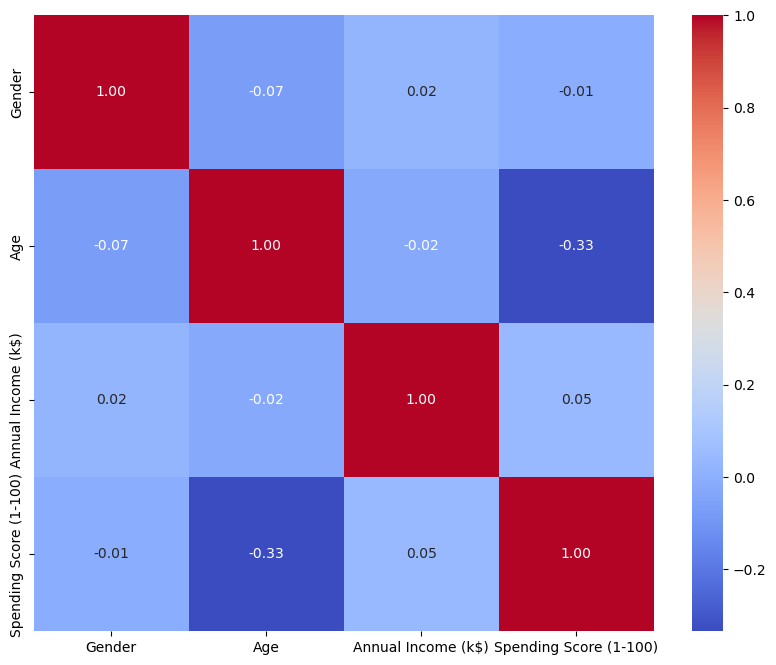

In [95]:
corr = data.corr()
plt.figure(figsize=(10,8))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.show()

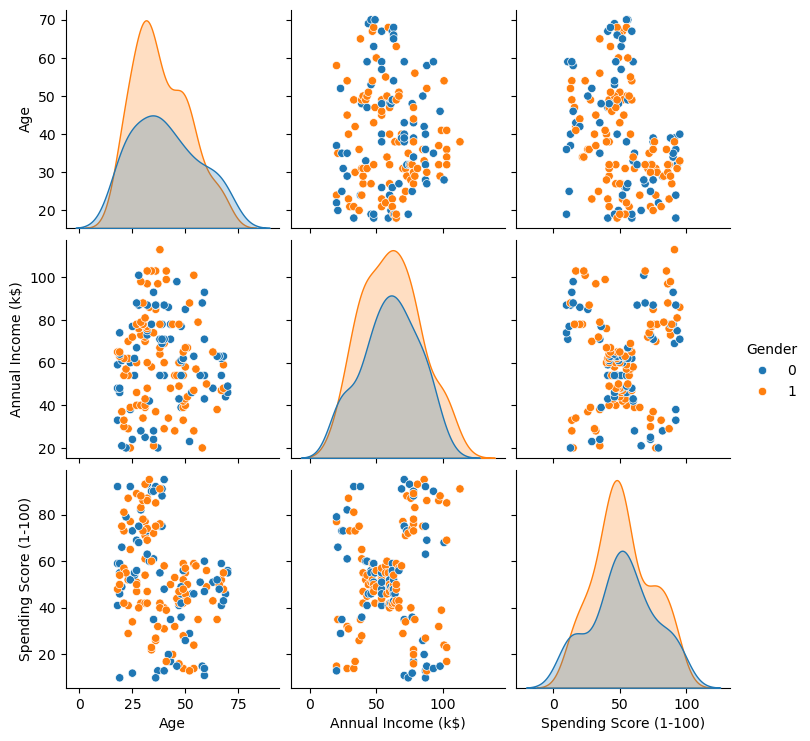

In [96]:
sns.pairplot(data, hue='Gender')

In [97]:
from sklearn.cluster import KMeans
scaler = MinMaxScaler()
data_scaled = scaler.fit_transform(data)
data_scaled = pd.DataFrame(data_scaled, columns=data.columns)

In [98]:
x=data_scaled[['Annual Income (k$)', 'Spending Score (1-100)']]

In [99]:
interr=[]
k=range(1,11)
for i in k:
    kmeans=KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(x)
    interr.append(kmeans.inertia_)

c:\Users\dg038\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\dg038\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\dg038\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\dg038\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Window

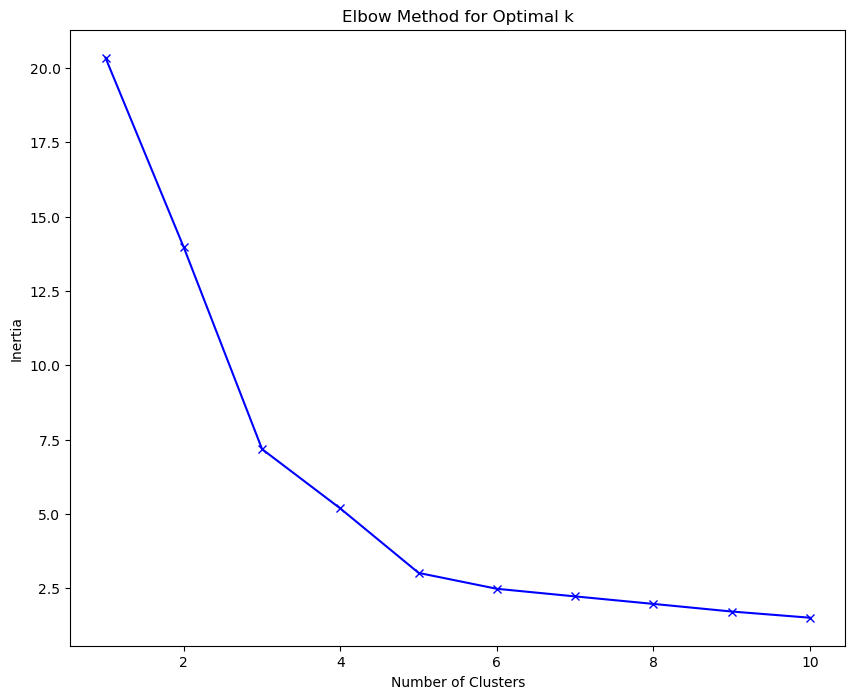

In [100]:
plt.figure(figsize=(10,8))
plt.plot(k,interr, 'bx-')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal k')
plt.show()

In [101]:
model=KMeans(n_clusters=5, init='k-means++', random_state=42)
model.fit(x)

c:\Users\dg038\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


KMeans(n_clusters=5, random_state=42)

In [102]:
y_pred=model.predict(x)
y_pred

array([2, 4, 2, 4, 2, 4, 2, 2, 4, 4, 2, 4, 2, 4, 2, 4, 4, 4, 2, 4, 2, 4,
       2, 4, 2, 4, 2, 4, 2, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 1, 3,
       1, 3, 1, 3, 3, 1, 3, 3, 3, 1, 3, 3, 1, 3, 1, 1, 3, 1, 3, 1, 3, 1,
       3, 1, 3, 3, 3, 1, 3, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3,
       1, 3, 1, 3, 1, 3, 1, 1, 3, 1, 3, 1, 3, 3], dtype=int32)

In [103]:
data_scaled['cluster']=y_pred
data_scaled 

,Gender,Age,Annual Income (k$),Spending Score (1-100),cluster
0,1.0,0.769231,0.000000,0.058824,2
1,1.0,0.115385,0.000000,0.788235,4
2,0.0,0.365385,0.000000,0.035294,2
3,0.0,0.076923,0.000000,0.811765,4
4,1.0,0.326923,0.010753,0.294118,2
...,...,...,...,...,...
163,1.0,0.442308,0.892473,0.082353,1
164,1.0,0.346154,0.892473,0.882353,3
165,1.0,0.307692,0.892473,0.152941,1
166,1.0,0.269231,0.892473,0.694118,3


In [104]:
model.predict([[0.6, 0.7]])

c:\Users\dg038\anaconda3\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(


array([3], dtype=int32)

Visualize The Clusters Using Scatter Plot

C:\Users\dg038\AppData\Local\Temp\ipykernel_18224\2750983917.py:2: UserWarning: The palette list has more values (29) than needed (5), which may not be intended.
  sns.scatterplot(data=data_scaled, x='Annual Income (k$)', y='Spending Score (1-100)', hue='cluster', palette=custom_colors)


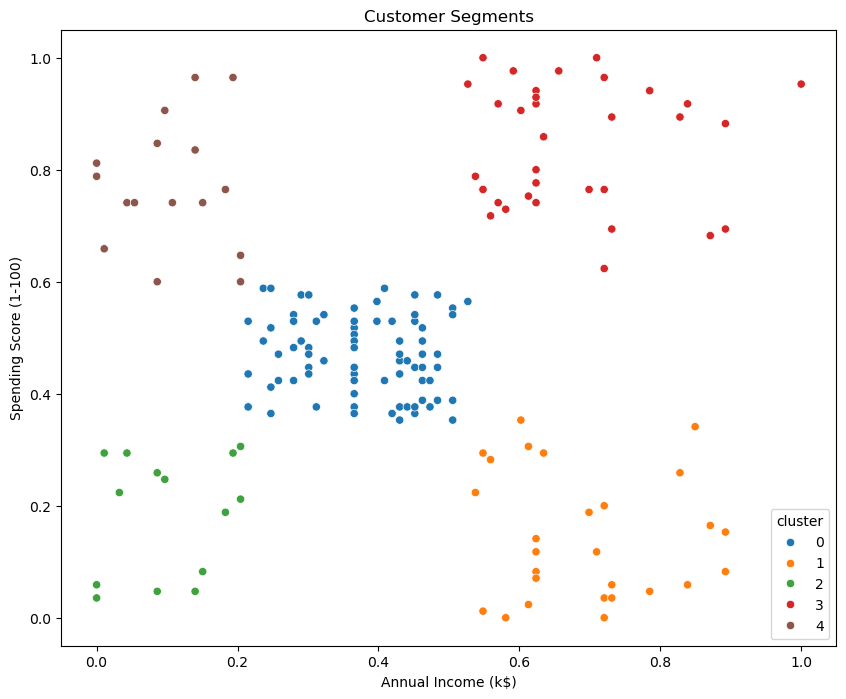

In [105]:
plt.figure(figsize=(10,8))
sns.scatterplot(data=data_scaled, x='Annual Income (k$)', y='Spending Score (1-100)', hue='cluster', palette=custom_colors)
plt.title('Customer Segments')
plt.show()

In [106]:
kmeans_silhouette_score = silhouette_score(x, y_pred)
print("Silhouette Score for k=5:", kmeans_silhouette_score)

Silhouette Score for k=5: 0.5607754558563622


Using DBSCAN


In [107]:
from sklearn.cluster import DBSCAN

In [108]:
X=data[['Annual Income (k$)', 'Spending Score (1-100)']].values

In [109]:
dbscan = DBSCAN(eps=10, min_samples=5)
lbl=dbscan.fit_predict(X)
data_scaled['DBSCAN_Cluster']=lbl
data_scaled.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100),cluster,DBSCAN_Cluster
0,1.0,0.769231,0.000000,0.058824,2,1
1,1.0,0.115385,0.000000,0.788235,4,0
2,0.0,0.365385,0.000000,0.035294,2,1
3,0.0,0.076923,0.000000,0.811765,4,0
4,1.0,0.326923,0.010753,0.294118,2,0


C:\Users\dg038\AppData\Local\Temp\ipykernel_18224\3998147652.py:2: UserWarning: The palette list has more values (29) than needed (5), which may not be intended.
  sns.scatterplot(data=data_scaled, x='Annual Income (k$)', y='Spending Score (1-100)', hue='DBSCAN_Cluster', palette=custom_colors)


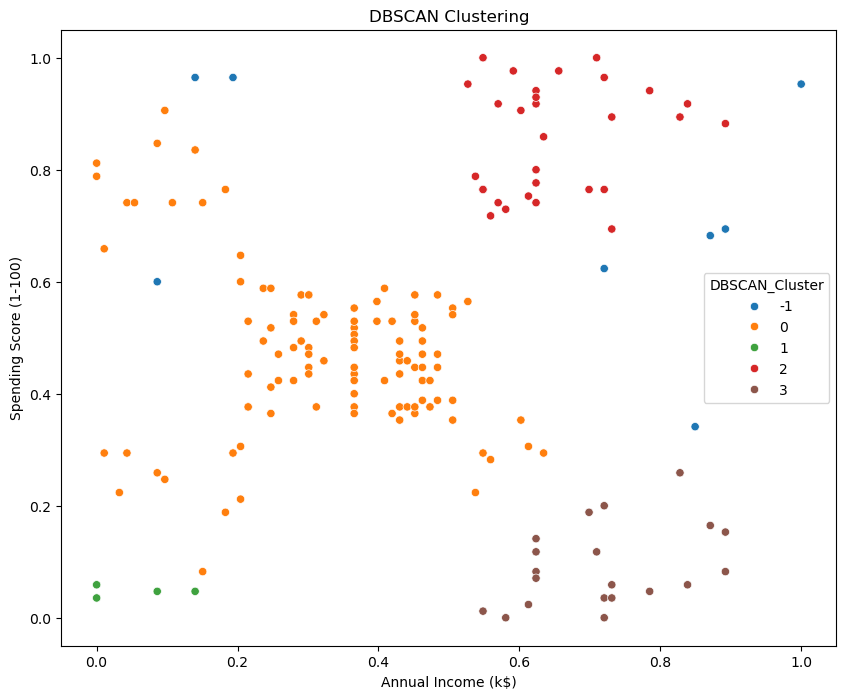

In [110]:
plt.figure(figsize=(10,8))
sns.scatterplot(data=data_scaled, x='Annual Income (k$)', y='Spending Score (1-100)', hue='DBSCAN_Cluster', palette=custom_colors)
plt.title('DBSCAN Clustering')
plt.show()

In [111]:
dbscan_silhouette_score = silhouette_score(X, lbl)
print("Silhouette Score for DBSCAN:", dbscan_silhouette_score)

Silhouette Score for DBSCAN: 0.4206834199856691
